In [1]:
import pickle
import pandas as pd
import numpy as np
from evaluations import * 

In [ ]:
good_questions = np.load('Data/OpinionQA/good_questions.npy')
Qs = pd.read_csv('Data/OpinionQA/Qs_to_use.csv')
with open('Data/OpinionQA/surveys.pkl', 'rb') as f:
    surveys = pickle.load(f)

real_answers = {}
for i in range(len(good_questions)):
    vals_i = surveys[good_questions[i]]['RESPONSE_NUMERIC'].values
    real_answers[good_questions[i]] = vals_i

In [3]:
synthetic_answers_all = {}
with open('Data/OpinionQA/synthetic answers/clean/synthetic_answers_clean_3.5turbo.pkl', 'rb') as f:
    synthetic_answers_all['gpt-3.5-turbo'] = pickle.load(f)
with open('Data/OpinionQA/synthetic answers/clean/synthetic_answers_clean_4omini.pkl', 'rb') as f:
    synthetic_answers_all['gpt-4o-mini'] = pickle.load(f)
with open('Data/OpinionQA/synthetic answers/clean/synthetic_answers_clean_4o.pkl', 'rb') as f:
    synthetic_answers_all['gpt-4o'] = pickle.load(f)
with open('Data/OpinionQA/synthetic answers/clean/synthetic_answers_clean_claude.pkl', 'rb') as f:
    synthetic_answers_all['claude-3-5-haiku'] = pickle.load(f)
with open('Data/OpinionQA/synthetic answers/clean/synthetic_answers_clean_Llama-3-8B-Instruct-Turbo.pkl', 'rb') as f:
    synthetic_answers_all['Llama-3-8B'] = pickle.load(f)
with open('Data/OpinionQA/synthetic answers/clean/synthetic_answers_clean_Llama-3.3-70B-Instruct-Turbo.pkl', 'rb') as f:
    synthetic_answers_all['Llama-3.3-70B'] = pickle.load(f)
with open('Data/OpinionQA/synthetic answers/clean/synthetic_answers_clean_Mistral-7B-Instruct-v0.3.pkl', 'rb') as f:
    synthetic_answers_all['Mistral-7B'] = pickle.load(f)
with open('Data/OpinionQA/synthetic answers/clean/synthetic_answers_clean_DeepSeek-V3.pkl', 'rb') as f:
    synthetic_answers_all['DeepSeek-V3'] = pickle.load(f)
with open('Data/OpinionQA/synthetic answers/clean/synthetic_answers_clean_random.pkl', 'rb') as f:
    synthetic_answers_all['random'] = pickle.load(f)

In [4]:
alphas = np.linspace(0.05, 0.5, 10)
gamma = 0.5
k_max = 100
ks = np.arange(1, k_max+1)
C = np.sqrt(2)
train_proportion = 0.6
synth_CI_type = 'Hoeffding'
rv_bound = 2
seed = 0
num_splits = 100

In [5]:
reports_interval_all, reports_point_all = get_reports_multiple(real_answers, synthetic_answers_all, good_questions, alphas, gamma, k_max, C, train_proportion, synth_CI_type = synth_CI_type, rv_bound = rv_bound, seed = seed, num_splits = num_splits)

gpt-3.5-turbo
gpt-4o-mini
gpt-4o
claude-3-5-haiku
Llama-3-8B
Llama-3.3-70B
Mistral-7B
DeepSeek-V3
random


In [ ]:
# save as pickle
with open('Data/OpinionQA/reports_interval_all.pkl', 'wb') as f:
    pickle.dump(reports_interval_all, f)

with open('Data/OpinionQA/reports_point_all.pkl', 'wb') as f:
    pickle.dump(reports_point_all, f)

In [5]:
# read from pickle
with open('Data/OpinionQA/reports_interval_all.pkl', 'rb') as f:
    reports_interval_all = pickle.load(f)

with open('Data/OpinionQA/reports_point_all.pkl', 'rb') as f:
    reports_point_all = pickle.load(f)

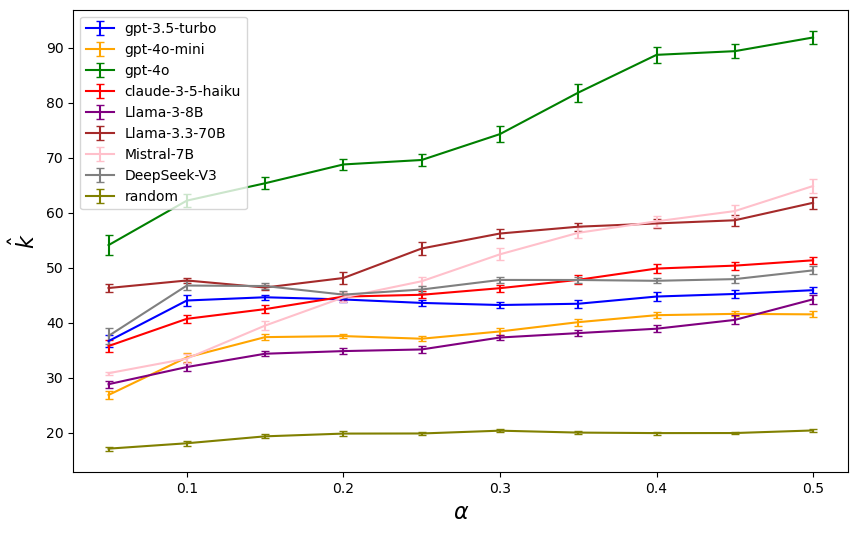

In [6]:
# all error bars are 95% confidence intervals
# metric = {'k_hat', 'synth_CI_width', 'test_miscov_rate'}
plot_reports(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma, metric = 'k_hat', type = 'interval')

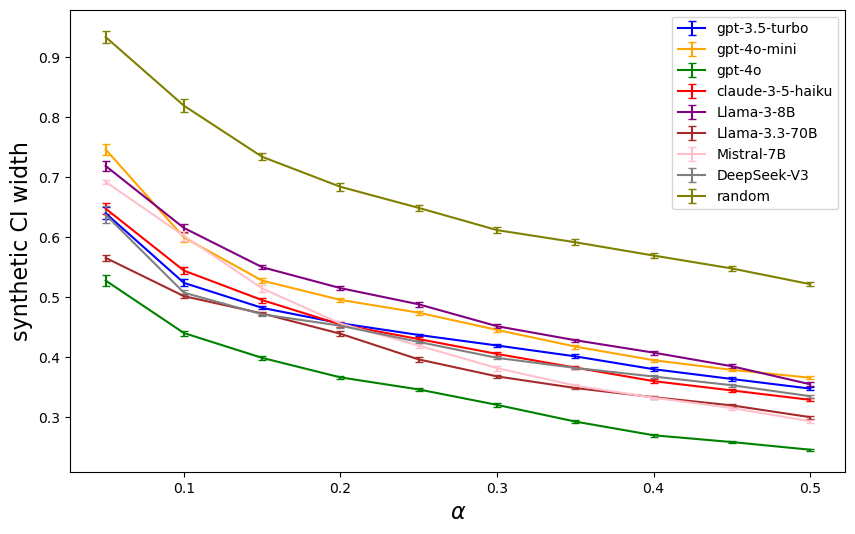

In [7]:
plot_reports(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma, metric = 'synth_CI_width', type = 'interval')

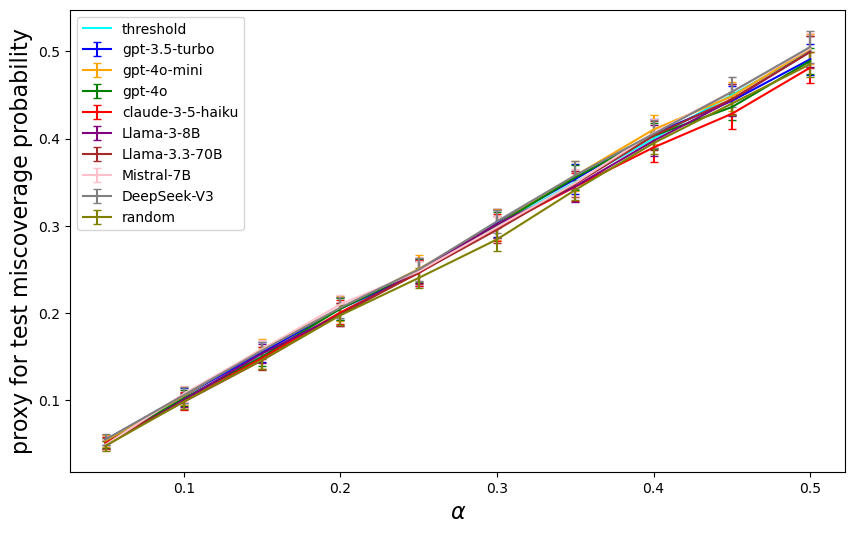

In [8]:
plot_reports(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma, metric = 'test_miscov_rate', type = 'interval')

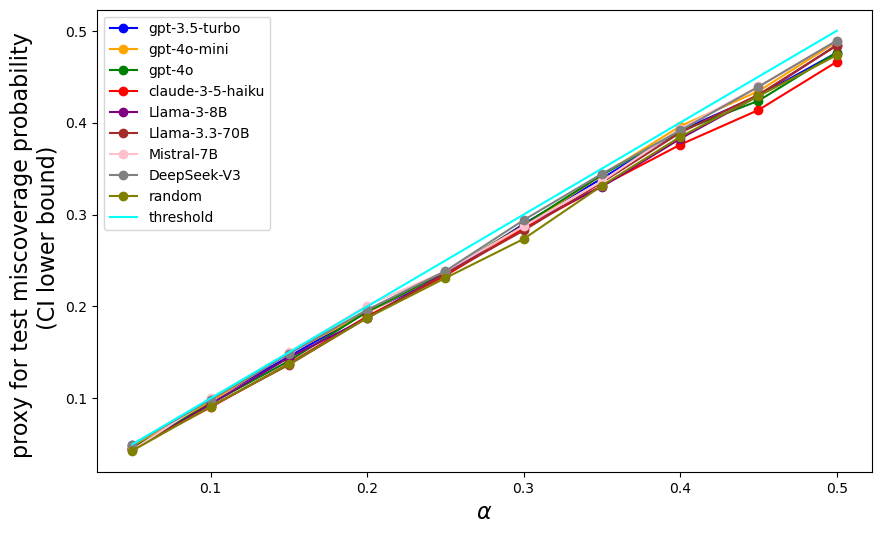

In [9]:
plot_reports(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma, metric = 'test_miscov_rate_lower', type = 'interval')

In [10]:
# columns are alphas, rows are models
# metric = {'k_hat', 'synth_CI_width', 'test_miscov_rate'}
# for 'k_hat' and 'synth_CI_width', we report the mean and 95% margin of error
# for 'test_miscov_rate', we report the mean and standard error
table = table_reports(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma, metric = 'test_miscov_rate')
table

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50
gpt-3.5-turbo,0.0547±0.003,0.1051±0.0045,0.1549±0.0059,0.2051±0.0067,0.2461±0.0075,0.3032±0.0082,0.3536±0.0087,0.4056±0.0086,0.4432±0.0086,0.4909±0.009
gpt-4o-mini,0.0535±0.0036,0.1052±0.0053,0.1588±0.0059,0.2052±0.0072,0.2505±0.008,0.3014±0.0089,0.3574±0.0088,0.4104±0.0087,0.4484±0.0086,0.5027±0.009
gpt-4o,0.051±0.0031,0.1022±0.0048,0.1501±0.0058,0.2049±0.0065,0.2486±0.0068,0.3012±0.0075,0.3555±0.0075,0.4031±0.0075,0.4361±0.0075,0.489±0.0078
claude-3-5-haiku,0.051±0.0036,0.0988±0.0052,0.1484±0.0065,0.2008±0.007,0.246±0.0076,0.2979±0.008,0.3448±0.0082,0.3899±0.0084,0.4284±0.0089,0.4813±0.0092
Llama-3-8B,0.0481±0.0028,0.1006±0.0041,0.1536±0.0057,0.1982±0.0067,0.2487±0.0075,0.3017±0.0081,0.3452±0.0091,0.3974±0.009,0.4442±0.0091,0.4996±0.0092
Llama-3.3-70B,0.0496±0.0031,0.0983±0.0043,0.1458±0.0057,0.1984±0.0066,0.2464±0.0067,0.2955±0.0078,0.3479±0.0078,0.4032±0.0086,0.4453±0.009,0.4994±0.0094
Mistral-7B,0.049±0.0033,0.1075±0.0046,0.1586±0.0053,0.21±0.0055,0.2478±0.0058,0.2983±0.0067,0.3492±0.0079,0.4065±0.0081,0.4536±0.0087,0.5035±0.0087
DeepSeek-V3,0.0549±0.0033,0.106±0.0046,0.1571±0.0052,0.2062±0.006,0.2499±0.0069,0.3051±0.0067,0.3579±0.0082,0.4053±0.0084,0.4535±0.0088,0.5049±0.0095
random,0.0478±0.0029,0.0986±0.0046,0.1462±0.0055,0.1975±0.006,0.2403±0.0057,0.2844±0.0067,0.3412±0.0059,0.3948±0.0062,0.4401±0.0068,0.4853±0.0073


In [11]:
# columns are alphas, rows are models
p_vals = test_miscoverage(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma)
p_vals

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50
gpt-3.5-turbo,0.0618,0.1293,0.1996,0.2245,0.6981,0.3460,0.3387,0.2591,0.7846,0.8430
gpt-4o-mini,0.1619,0.1642,0.0658,0.2352,0.4741,0.4363,0.2000,0.1150,0.5717,0.3812
gpt-4o,0.3679,0.3218,0.4910,0.2243,0.5837,0.4379,0.2329,0.3388,0.9686,0.9226
claude-3-5-haiku,0.3857,0.5889,0.5945,0.4558,0.7030,0.6029,0.7370,0.8853,0.9922,0.9791
Llama-3-8B,0.7571,0.4376,0.2609,0.6072,0.5689,0.4178,0.7018,0.6132,0.7391,0.5169
Llama-3.3-70B,0.5505,0.6519,0.7687,0.5936,0.7055,0.7207,0.6050,0.3530,0.6973,0.5274
Mistral-7B,0.6249,0.0505,0.0517,0.0333,0.6473,0.5988,0.5394,0.2119,0.3380,0.3426
DeepSeek-V3,0.0686,0.0969,0.0841,0.1513,0.5075,0.2257,0.1678,0.2638,0.3457,0.3024
random,0.7779,0.6214,0.7527,0.6586,0.9570,0.9903,0.9321,0.7984,0.9259,0.9783


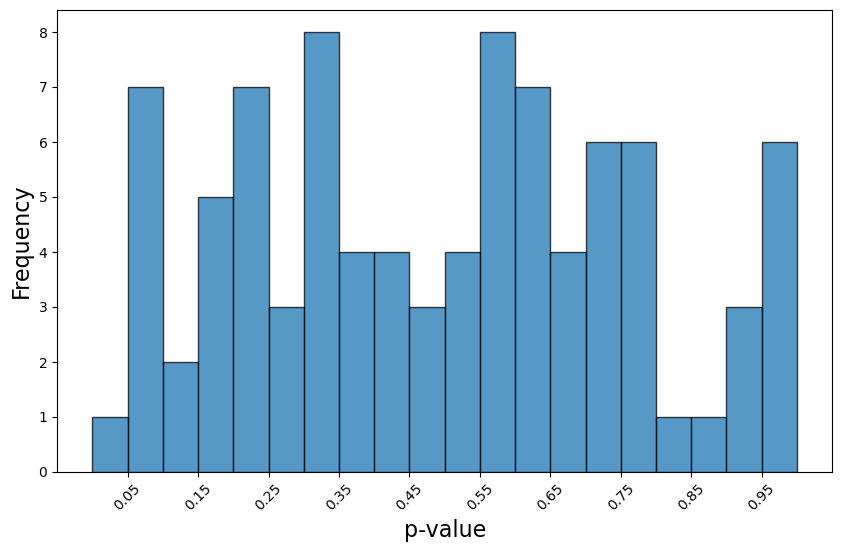

In [ ]:
# draw a histogram of the p-values
p_vals_array = p_vals.values.flatten()
plt.figure(figsize = (10, 6))
plt.hist(p_vals_array, bins=np.linspace(0, 1, 21), edgecolor='black', alpha = 0.75)
plt.xlabel('p-value', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(np.linspace(0, 1, 21)[1:-1][::2], rotation=45)